In [3]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests

In [4]:
df = pd.read_csv('OnlineArrestData1980-2018.csv')

In [5]:
groups = df.drop(columns = ['VIOLENT', 'RACE', 'F_DRUGOFF', 'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])

In [6]:
groups = groups[groups.YEAR == 2018]

In [ ]:
groups = df.drop(columns = ['VIOLENT', 'RACE', 'F_DRUGOFF', 'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])
groups = groups[groups.YEAR == 2018]
groups = groups = groups.groupby(['COUNTY','GENDER','YEAR']).sum().reset_index()
groups = groups.sort_values('PROPERTY', ascending = False)
groups.head()

In [198]:
groups2 = df.drop(columns = ['VIOLENT', 'RACE', 'F_DRUGOFF', 'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])
groups2 = groups2[groups2.YEAR == 2018]
groups2 = groups2.groupby(['COUNTY', 'YEAR']).sum().reset_index()
groups2 = groups2.sort_values('PROPERTY', ascending = False)
groups2

,COUNTY,YEAR,PROPERTY
18,Los Angeles County,2018,18901
35,San Bernardino County,2018,7310
29,Orange County,2018,4877
36,San Diego County,2018,4140
32,Riverside County,2018,3565
33,Sacramento County,2018,3142
0,Alameda County,2018,3051
42,Santa Clara County,2018,2938
6,Contra Costa County,2018,2740
14,Kern County,2018,2607


In [138]:
male_avg = np.array(male_avg)

In [21]:
page = requests.get('https://www.california-demographics.com/counties_by_population')
soup = BeautifulSoup(page.content, 'html.parser')
container =  pd.read_html(page.content)

In [22]:
container = pd.DataFrame(container[0])

In [23]:
container.drop(columns = ['Rank'], inplace = True)

In [259]:
combined_table = container.join(groups2.set_index('COUNTY'), on = 'County')

In [260]:
combined_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
County        59 non-null object
Population    59 non-null object
YEAR          58 non-null float64
PROPERTY      58 non-null float64
dtypes: float64(2), object(2)
memory usage: 2.0+ KB


In [261]:
combined_table = combined_table.drop(58, axis=0)
combined_table = combined_table.astype({'Population':int, 'PROPERTY':int})

In [266]:
percentage = combined_table['PROPERTY']/combined_table['Population']
type(df86)

pandas.core.frame.DataFrame

In [267]:
combined_table['percentage'] = percentage

In [298]:
combined_table = combined_table.groupby(['County']).sum().reset_index()
combined_table = combined_table.sort_values('percentage', ascending = False)
combined_table.tail()

,County,Population,YEAR,PROPERTY,percentage
40,San Mateo County,769545,2018.0,874,0.001136
2,Amador County,39383,2018.0,40,0.001016
4,Calaveras County,45602,2018.0,42,0.000921
34,San Benito County,61537,2018.0,51,0.000829
25,Mono County,14250,2018.0,9,0.000632


In [297]:
sc = combined_table[combined_table['County'] == 'Sierra County']
sbc = combined_table[combined_table['County'] == 'San Bernardino County']
tc = combined_table[combined_table['County'] == 'Tulare County']
kc = combined_table[combined_table['County'] == 'Kern County']
sutter = combined_table[combined_table['County'] == 'Sutter County']
top_5 = pd.concat([sc, sbc, tc, kc, sutter])
top_5

,County,Population,YEAR,PROPERTY,percentage
45,Sierra County,2987,2018.0,15,0.005022
35,San Bernardino County,2171603,2018.0,7310,0.003366
53,Tulare County,465861,2018.0,1495,0.003209
14,Kern County,896764,2018.0,2607,0.002907
50,Sutter County,96807,2018.0,254,0.002624


In [311]:
smc = combined_table[combined_table['County'] == 'San Mateo County']
ac = combined_table[combined_table['County'] == 'Amador County']
cc = combined_table[combined_table['County'] == 'Calaveras County']
sbc = combined_table[combined_table['County'] == 'San Benito County']
mc = combined_table[combined_table['County'] == 'Mono County']
bot_5 = pd.concat([smc, ac, cc, sbc, mc])
bot_5

,County,Population,YEAR,PROPERTY,percentage
40,San Mateo County,769545,2018.0,874,0.001136
2,Amador County,39383,2018.0,40,0.001016
4,Calaveras County,45602,2018.0,42,0.000921
34,San Benito County,61537,2018.0,51,0.000829
25,Mono County,14250,2018.0,9,0.000632


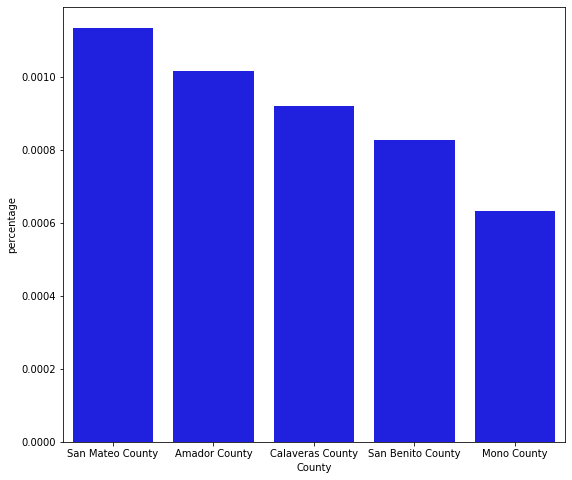

In [322]:
plt.figure(figsize = (9,8))
sns.barplot(y = 'percentage', x ='County', data = bot_5, color = 'blue')
plt.show()

In [41]:
male_crimes = df[df['GENDER']!= 'Female']
male_crimes = male_crimes[male_crimes['YEAR']==2018]
male_crimes = male_crimes.drop(columns = ['VIOLENT', 'RACE', 'F_DRUGOFF', 'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])
male_crimes=male_crimes.groupby(['GENDER', 'COUNTY', 'YEAR']).sum().reset_index()
male_avg = male_crimes['PROPERTY'].mean()
male_std = male_crimes['PROPERTY'].std()
male_crimes = male_crimes.sort_values('PROPERTY', ascending = False)
male_crimes= container.join(male_crimes.set_index('COUNTY'), on = 'County')
male_crimes = male_crimes.drop(58, axis = 0)
male_crimes = male_crimes.astype({'PROPERTY':int, 'Population':int})
male_percent = male_crimes['PROPERTY']/male_crimes['Population']
male_crimes['male percent'] = male_percent
male_crimes

,County,Population,GENDER,YEAR,PROPERTY,male percent
0,Los Angeles County,10105518,Male,2018.0,14261,0.001411
1,San Diego County,3343364,Male,2018.0,3163,0.000946
2,Orange County,3185968,Male,2018.0,3635,0.001141
3,Riverside County,2450758,Male,2018.0,2756,0.001125
4,San Bernardino County,2171603,Male,2018.0,5334,0.002456
5,Santa Clara County,1937570,Male,2018.0,2163,0.001116
6,Alameda County,1666753,Male,2018.0,2280,0.001368
7,Sacramento County,1540975,Male,2018.0,2344,0.001521
8,Contra Costa County,1150215,Male,2018.0,1922,0.001671
9,Fresno County,994400,Male,2018.0,1491,0.001499


In [42]:
male_crimes = df[df['GENDER']!= 'Male']
male_crimes = male_crimes[male_crimes['YEAR']==2018]
male_crimes = male_crimes.drop(columns = ['VIOLENT', 'RACE', 'F_DRUGOFF', 'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])
male_crimes=male_crimes.groupby(['GENDER', 'COUNTY', 'YEAR']).sum().reset_index()
male_avg = male_crimes['PROPERTY'].mean()
male_std = male_crimes['PROPERTY'].std()
male_crimes = male_crimes.sort_values('PROPERTY', ascending = False)
top_5_male_counties = male_crimes.head()
top_5_male_counties = pd.DataFrame(top_5_male_counties)
bot_5_male_counties = male_crimes.tail()
bot_5_male_counties = pd.DataFrame(bot_5_male_counties)
top_5_male_counties

,GENDER,COUNTY,YEAR,PROPERTY
18,Female,Los Angeles County,2018,4640
35,Female,San Bernardino County,2018,1976
29,Female,Orange County,2018,1242
36,Female,San Diego County,2018,977
6,Female,Contra Costa County,2018,818


In [178]:
page = requests.get('https://www.california-demographics.com/counties_by_population')
soup = BeautifulSoup(page.content, 'html.parser')
container =  pd.read_html(page.content)
container = pd.DataFrame(container[0])
container.drop(columns = ['Rank'], inplace = True)

In [179]:
container.drop(58, axis=0, inplace=True)

AttributeError: 'Rectangle' object has no property 'denisty'

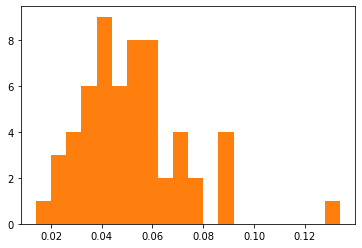

In [139]:
ax1 = plt.hist(top_5_female_counties['Female Percent'], bins = 20)
ax2 = plt.hist(top_5_male_counties['Male Percent'], bins = 20)


In [122]:
# container = container.astype({'Population':str})
# container = np.array(container)
container = container.astype({'Population':int})

In [101]:
container.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 2 columns):
County        58 non-null object
Population    58 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [110]:
top_male_counties= container.join(male_crimes.set_index('COUNTY'), on = 'County')
# top_male_counties = top_male_counties.drop(58, axis = 0)

top_male_counties = top_male_counties.astype({'PROPERTY':int, 'Population':int})
male_percent = (top_male_counties['PROPERTY']/top_male_counties['Population'])*100
top_male_counties['Male Percent'] = male_percent

top_5_male_counties = top_male_counties.sort_values('Male Percent', ascending = False)
male_avg = top_5_male_counties['Male Percent'].mean()

top_5_male_counties.head()

,County,Population,GENDER,YEAR,PROPERTY,Male Percent
56,Sierra County,2987,Female,2018,4,0.133914
4,San Bernardino County,2171603,Female,2018,1976,0.090993
57,Alpine County,1101,Female,2018,1,0.090827
39,Lake County,64382,Female,2018,56,0.086981
17,Tulare County,465861,Female,2018,403,0.086506


In [140]:
import scipy.stats as stats

In [181]:
top_5_male_counties.head()

,County,Population,GENDER,YEAR,PROPERTY,Male Percent
56,Sierra County,2987,Female,2018,4,0.133914
4,San Bernardino County,2171603,Female,2018,1976,0.090993
57,Alpine County,1101,Female,2018,1,0.090827
39,Lake County,64382,Female,2018,56,0.086981
17,Tulare County,465861,Female,2018,403,0.086506


Text(0.5, 0, 'whole percent')

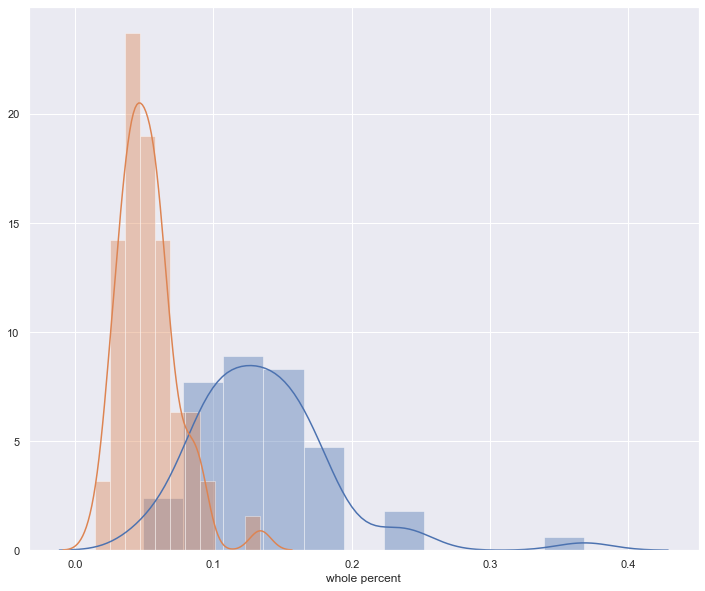

In [191]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(males)
sns.distplot(females)
plt.xlabel('whole percent')

In [161]:
def sample_variance(sample):
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean)**2)/(len(sample)-1)

In [162]:
def pooled_variance(sample1, sample2):
    n1, n2 = len(sample1), len(sample2)
    var_1, var_2 = sample_variance(sample1), sample_variance(sample2)
    return (((n1-1)*var_1)+((n2-1)*var_2))/((n1 + n2) - 2)

In [166]:
def twosample_tstatistic(expr, ctrl):
    expr_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    numerator = expr_mean - ctrl_mean
    pool_var = pooled_variance(expr, ctrl)
    n_e, n_c = len(expr), len(ctrl)
    num = expr_mean-ctrl_mean
    den = np.sqrt(pool_var*((1/n_e)+(1/n_c)))
    return num/den

t_stat = twosample_tstatistic(males, females)
t_stat

0.0

In [185]:
male_crimes = df[df['GENDER']!= 'Female']
male_crimes = male_crimes[male_crimes['YEAR']==2018]
male_crimes = male_crimes.drop(columns = ['VIOLENT', 'RACE', 'F_DRUGOFF', 'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])
male_crimes=male_crimes.groupby(['GENDER', 'COUNTY', 'YEAR']).sum().reset_index()
male_avg = male_crimes['PROPERTY'].mean()
male_std = male_crimes['PROPERTY'].std()
print(male_avg)
print(male_std)

938.1724137931035
2074.332343552101


In [186]:
top_male_counties= container.join(male_crimes.set_index('COUNTY'), on = 'County')
# top_male_counties = top_male_counties.drop(58, axis = 0)

top_male_counties = top_male_counties.astype({'PROPERTY':int, 'Population':int})
male_percent = (top_male_counties['PROPERTY']/top_male_counties['Population'])*100
top_male_counties['Male Percent'] = male_percent

top_5_male_counties = top_male_counties.sort_values('Male Percent', ascending = False)
male_avg = top_5_male_counties['Male Percent'].mean()

top_5_male_counties.head()

,County,Population,GENDER,YEAR,PROPERTY,Male Percent
56,Sierra County,2987,Male,2018,11,0.368262
4,San Bernardino County,2171603,Male,2018,5334,0.245625
17,Tulare County,465861,Male,2018,1092,0.234405
10,Kern County,896764,Male,2018,2064,0.230161
54,Trinity County,12535,Male,2018,24,0.191464


In [187]:
top_5_female_counties

,County,Population,GENDER,YEAR,PROPERTY,Female Percent
56,Sierra County,2987,Female,2018,4,0.133914
4,San Bernardino County,2171603,Female,2018,1976,0.090993
57,Alpine County,1101,Female,2018,1,0.090827
39,Lake County,64382,Female,2018,56,0.086981
17,Tulare County,465861,Female,2018,403,0.086506
36,Sutter County,96807,Female,2018,77,0.079540
38,Yuba County,78041,Female,2018,62,0.079445
8,Contra Costa County,1150215,Female,2018,818,0.071117
40,Tehama County,63916,Female,2018,45,0.070405
49,Colusa County,21627,Female,2018,15,0.069358


In [188]:
males = top_5_male_counties['Male Percent']
females = top_5_female_counties['Female Percent']

In [189]:
twosample_tstatistic(males, females)

11.491664385097177

In [192]:
stats.ttest_ind(males,females)

Ttest_indResult(statistic=11.49166438509717, pvalue=9.097052562785951e-21)